# Data Cleaning and Preprocessing

In [2]:
import sys
import os
sys.path.append('../scripts')
from data_loader import *
from data_cleaner import *
from data_cleaner import clean_data

## Load raw dataset

In [3]:
# path to the CSV file
filename = 'data.csv'
path = os.path.join('..', 'data/raw', filename)

# Load dataset
raw_df = load_data(path)

In [4]:
raw_df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [15]:
raw_df['ChannelId'].unique()

array(['ChannelId_3', 'ChannelId_2', 'ChannelId_1', 'ChannelId_5'],
      dtype=object)

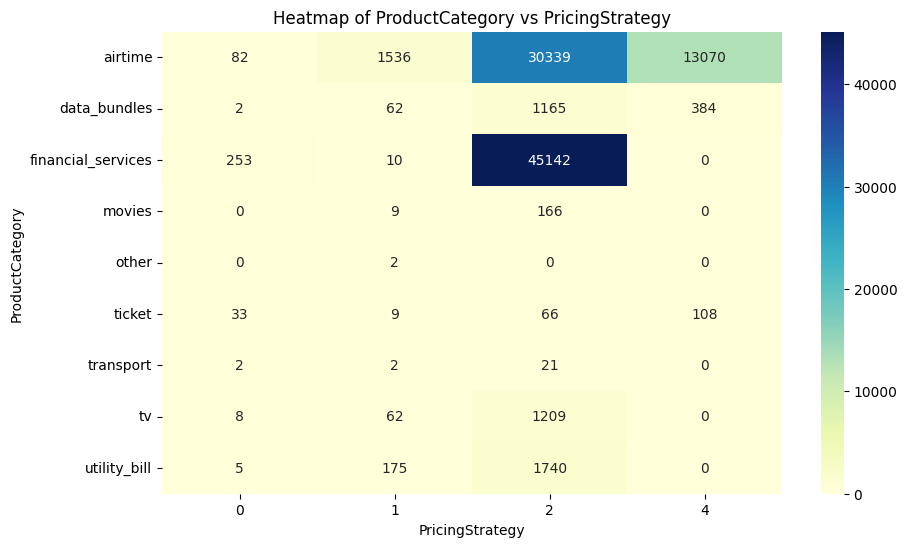

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
crosstab = pd.crosstab(raw_df['ProductCategory'], raw_df['PricingStrategy'])

# Visualize with heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, cmap="YlGnBu", fmt="d")
plt.title('Heatmap of ProductCategory vs PricingStrategy')
plt.show()

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

## Use data cleaning pipeline

In [4]:
cleaned_df = clean_data(raw_df)

In [5]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95393 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   TransactionId         95393 non-null  object             
 1   BatchId               95393 non-null  object             
 2   AccountId             95393 non-null  object             
 3   SubscriptionId        95393 non-null  object             
 4   CustomerId            95393 non-null  object             
 5   CurrencyCode          95393 non-null  object             
 6   CountryCode           95393 non-null  int64              
 7   ProviderId            95393 non-null  object             
 8   ProductId             95393 non-null  object             
 9   ProductCategory       95393 non-null  object             
 10  ChannelId             95393 non-null  object             
 11  Amount                95393 non-null  float64            
 12  Value    

In [6]:
# Define output folder and file name
output_folder = os.path.join('..', 'data', 'processed')
filename = 'cleaned_df.parquet'

output_path = save_data(cleaned_df, output_folder, filename)

Dataset saved to ..\data\processed\cleaned_df.parquet
